# Introduction 
The purpose of this notebook is to perform EDA and machine learning on the Iris dataset. This is done with the intention to:
- Gain insights into the:
    - Distribution of the various species
    - Classification and major differences between the species
- Predict the particular species of Iris flower

# Loading the Data

In [1]:
import pandas as pd
df = pd.read_csv("Iris.csv")
df


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Examining the data

In [2]:
df.info() #no missing values in dataset. 4 numerical variables, 1 categorical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [3]:
df.shape #150 entries, 6 columns

(150, 6)

In [4]:
df.size

900

# Introducing Some New Engineered Variables
There are some new variables we can engineer that may be useful in prediction and for visualization. 

In [5]:
df['SepalAreaCm2'] = df['SepalLengthCm']*df['SepalWidthCm']
df['PetalAreaCm2'] = df['PetalLengthCm']*df['PetalWidthCm']
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalAreaCm2,PetalAreaCm2
0,1,5.1,3.5,1.4,0.2,Iris-setosa,17.85,0.28
1,2,4.9,3.0,1.4,0.2,Iris-setosa,14.70,0.28
2,3,4.7,3.2,1.3,0.2,Iris-setosa,15.04,0.26
3,4,4.6,3.1,1.5,0.2,Iris-setosa,14.26,0.30
4,5,5.0,3.6,1.4,0.2,Iris-setosa,18.00,0.28
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,20.10,11.96
146,147,6.3,2.5,5.0,1.9,Iris-virginica,15.75,9.50
147,148,6.5,3.0,5.2,2.0,Iris-virginica,19.50,10.40
148,149,6.2,3.4,5.4,2.3,Iris-virginica,21.08,12.42


# Visualizing the Data

There are a number of questions we can ask about our data:
- How many distinct species of iris flower are there? 

- What differentiates the different species?

    - How do the lengths differ?
    - How do the Widths differ, and by how much?
    - How do the respective sepal and petal areas differ?
    
- How can we use that information to predict the species of any given sample?

In [6]:
print(f"There are {len(df['Species'].unique())} unique species of iris flower") #there are 3 unique species of iris flower

There are 3 unique species of iris flower


## How are the species different?


We can examine their physical differences and group the samples to better understand differences

Text(0.5, 36.72222222222221, 'Sepal Length (cm)')

<Figure size 1000x1000 with 0 Axes>

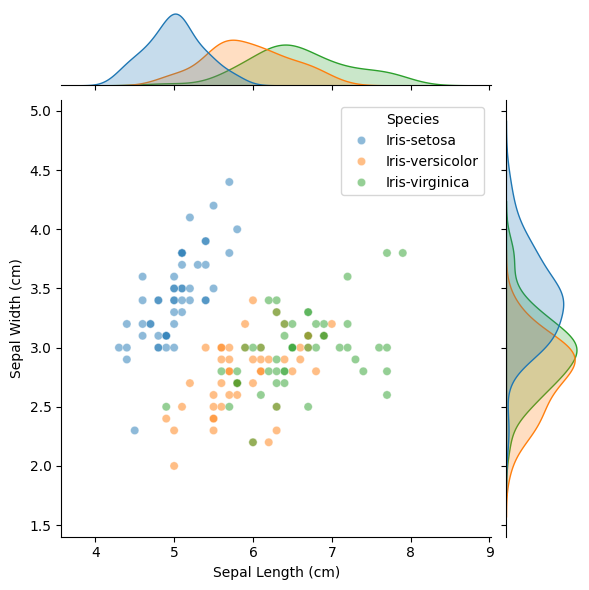

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.jointplot(df, x='SepalLengthCm',y='SepalWidthCm',hue='Species',alpha=0.5)
plt.ylabel("Sepal Width (cm)")
plt.xlabel("Sepal Length (cm)")
#plt.title('Sepal Width vs Sepal Length For Each Species')

Text(37.722222222222214, 0.5, 'Petal Width (cm)')

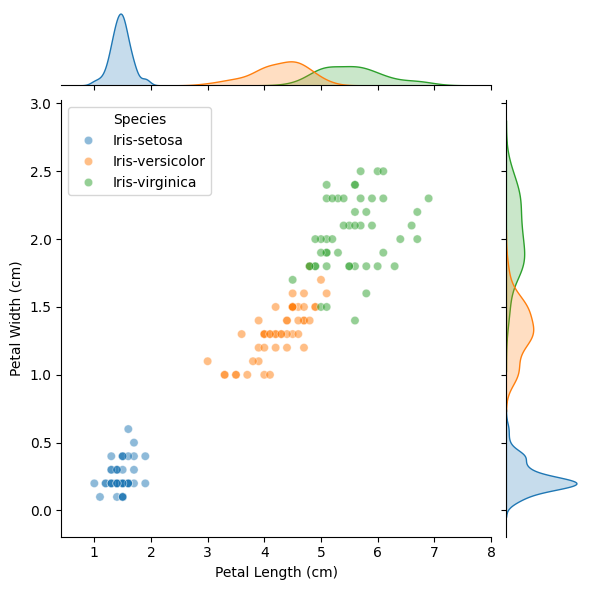

In [8]:

sns.jointplot(df, x='PetalLengthCm',y='PetalWidthCm',hue='Species',alpha=0.5)
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")

There are three distinct clusters, representing the differences between the flower species

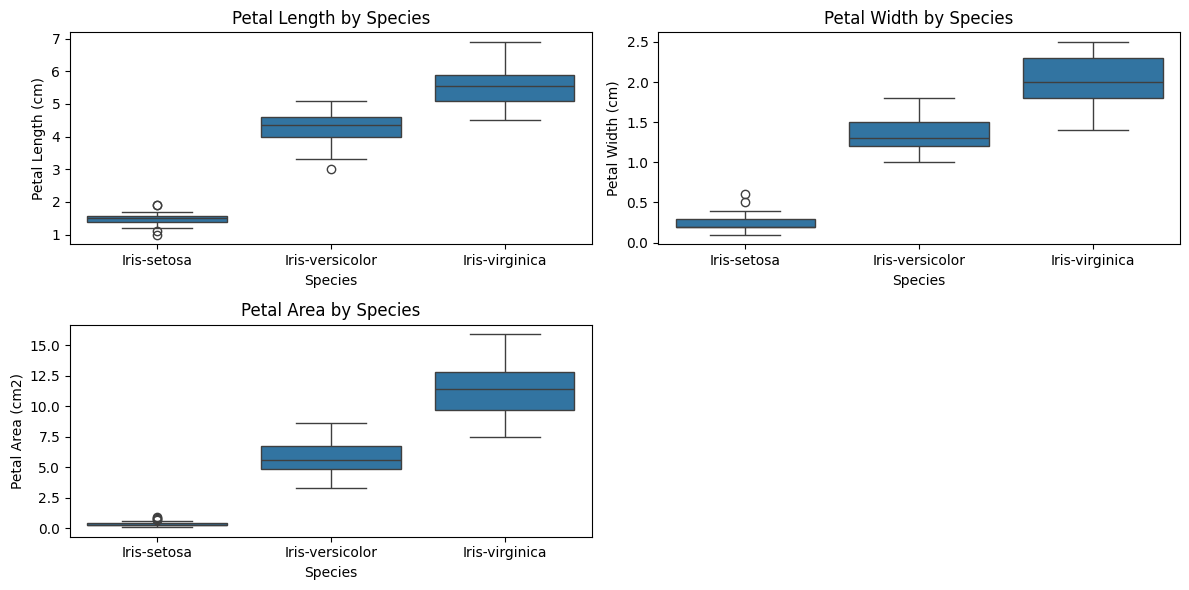

In [9]:

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.boxplot(x='Species', y='PetalLengthCm', data=df)
plt.title('Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')

plt.subplot(2, 2, 2)
sns.boxplot(x='Species', y='PetalWidthCm', data=df)
plt.title('Petal Width by Species')
plt.xlabel('Species')
plt.ylabel('Petal Width (cm)')

plt.subplot(2,2,3)
sns.boxplot(x='Species', y='PetalAreaCm2', data=df)
plt.title('Petal Area by Species')
plt.xlabel('Species')
plt.ylabel('Petal Area (cm2)')

plt.tight_layout()
plt.show()


We can observe that for the iris species:
 - Iris setosa has the shortest petals, followed by versicolor and virginica
 - Iris setosa has the thinnest petals, followed by versicolor and virginica
 - Naturally, the same order is followed as it relates to petal area
 
Now that we have these notable differences between the different species, it is possible to use these parameters in order to predict the species of a given sample. 

# Predictive ML Model

We will use an XGBClassifier model in predict the species of flower

In [10]:
X = df.drop(['Species','Id'], axis=1)
y = df['Species']

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)
#all variables are numerical, so no encoding required

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, make_scorer
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold

label_encoder = LabelEncoder()

y_encoded = label_encoder.fit_transform(y)

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, list(range(X.shape[1])))
    ]
)

params = {
    'objective': 'binary:logistic',  
    'eval_metric': 'logloss',  
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100
}

model = xgb.XGBClassifier(**params)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', model)
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate the pipeline using cross-validation for accuracy
accuracy_scores = cross_val_score(pipeline, X, y_encoded, cv=cv, scoring='accuracy')
print(f"Cross-validated accuracy scores: {accuracy_scores}")
print(f"Mean accuracy: {accuracy_scores.mean()}")



Cross-validated accuracy scores: [0.96666667 0.96666667 0.9        1.         0.93333333]
Mean accuracy: 0.9533333333333334


Cross-validated accuracy scores: [0.96666667 0.96666667 0.9        1.         0.93333333]
Mean accuracy: 0.9533333333333334


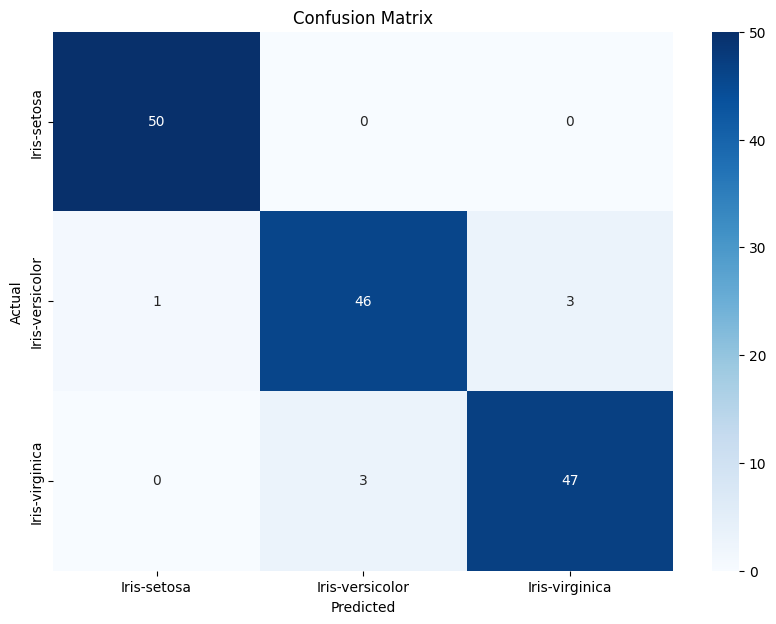

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, make_scorer, confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Define the preprocessing pipeline for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler())
])

# Define the column transformer (assuming all features are numerical)
# Adjust the range of indices [0, X.shape[1]) if needed based on your dataset
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, list(range(X.shape[1])))
    ]
)

# Define the XGBoost parameters
params = {
    'objective': 'binary:logistic',  # for binary classification
    'eval_metric': 'logloss',  # log likelihood loss
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100
}

# Initialize the XGBoost model
model = xgb.XGBClassifier(**params)

# Create the full pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', model)
])


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = cross_val_score(pipeline, X, y_encoded, cv=cv, scoring='accuracy')
print(f"Cross-validated accuracy scores: {accuracy_scores}")
print(f"Mean accuracy: {accuracy_scores.mean()}")
y_pred_encoded = cross_val_predict(pipeline, X, y_encoded, cv=cv)
conf_matrix = confusion_matrix(y_encoded, y_pred_encoded)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


